In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import os
from io import StringIO
import json
%matplotlib inline 

In [32]:
base_path =  "../experimental_data/lending_small-lending_PaS1_quantitative_monitor_100000000_1_1685737585"
name = "data_0.csv"
meta_name = "meta.json"
batch_size = 10**6
header = ["$Observations$", "$State$", "$Observation$","$Execution \; Time$" ,"$Lower \; Bound$", "$Upper \; Bound$", "$Point \; Estimate$"]
        

In [57]:
def slim_file(name, base_path ,increments):
    i = 0
    from_path = os.path.join(base_path,name)
    to_path = os.path.join(base_path, "slim_"+name)
    new_file = StringIO()
    with open(from_path, "r") as f:
        for line in f:
            if i % increments==0:
                print(i)
                new_file.write(line)
            i += 1
    with open(to_path, "w") as f:
        f.write(new_file.getvalue())
        
def get_meta(base_path, name):
    with open(os.path.join(base_path,name), "r") as f:
        meta_dict = json.load(f)
    return meta_dict


def generate_data_frame(base_path, name, meta_name):
    meta_dict = get_meta(base_path, meta_name)
    df =  pd.read_csv(os.path.join(base_path, "slim_"+name), names=header)
    df["$True \; Value$"] = meta_dict["true_value"]
    df = df[["$Observations$","$Lower \; Bound$", "$Upper \; Bound$",  "$True \; Value$"]]
    df2 = pd.melt(df, value_vars=["$Lower \; Bound$", "$Upper \; Bound$", "$True \; Value$"], 
              id_vars=["$Observations$"], value_name="$Property \; Value$", var_name="$Bounds$")
    return df
    
    

In [58]:
# slim_file(name, base_path, batch_size)

In [62]:
df = generate_data_frame(base_path, name, meta_name)
df = df[["$Observations$","$Lower \; Bound$", "$Upper \; Bound$",  "$True \; Value$"]]

In [64]:
df2 = pd.melt(df, value_vars=["$Lower \; Bound$", "$Upper \; Bound$", "$True \; Value$"], 
              id_vars=["$Observations$"], value_name="$Property \; Value$", var_name="$Bounds$")

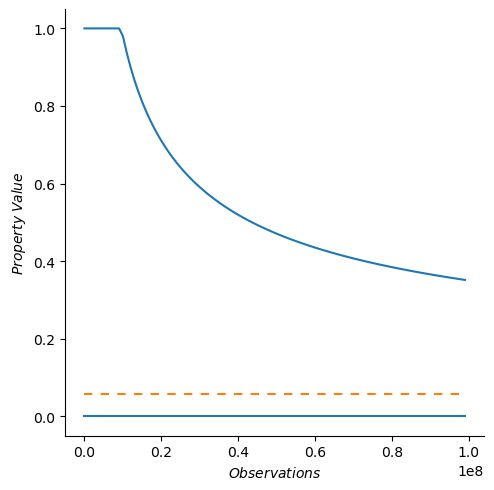

In [120]:
sns.relplot(kind="line", data=df2, x="$Observations$", y="$Property \; Value$", 
            style="$Bounds$", dashes=["", "",(4, 4)], legend=False , hue="$Bounds$", 
            palette=[sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1]])
plt.savefig(os.path.join(base_path, "concentration.pdf"), dpi=1000)

In [126]:
cs = 3
n = 2
k = math.comb(cs + n -1,n)**2

In [127]:
x = (k+k*2+k*2*cs+k*2*cs*2+ k*2*cs*2*3)

In [128]:
x

2052

In [104]:
x*32*10**(-9)

53.826117408

In [129]:
8300000000/10**10

0.83

In [ ]:
v